# EDA 레포트 작성 구조 (Markdown 기준 예시)
EDA(Exploratory Data Analysis, 탐색적 데이터 분석) 레포트는 데이터를 처음 접했을 때 **구조를 이해하고, 패턴을 발견하며, 문제점을 파악**하는 과정을 **체계적으로 문서화**하는 보고서이다.

## 1. 프로젝트 개요

### 분석 목적
1. **OTT별 작품 필터링 기능** → Provider별 장르 강세 분석
2. **숨은 명작 찾기** → 투표수 낮고 평점 높은 작품 분석
   - 조건: 투표수는 평균 이상, 사분위수 90% 이상, 로튼 6점대 이상

### 데이터 출처 및 설명
- 데이터 출처: tmdb_combined_10k.csv
- 데이터 구성: 총 7개 컬럼, 약 10,000개 행
- 주요 컬럼: `id`, `title`, `type`, `genres`, `providers`, `vote_count`, `vote_average`


In [39]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('../data/tmdb_combined_10k.csv')

print("데이터 로드 완료")


데이터 로드 완료


## 2. 데이터 기본 정보 확인

- 행/열 수
- 각 변수 이름, 타입, 결측치 여부 등


In [40]:
print("=" * 60)
print("2. 데이터 기본 정보")
print("=" * 60)

print(f"\n총 데이터 수: {df.shape[0]:,}개")
print(f"컬럼 수: {df.shape[1]}개")
print(f"\n컬럼명: {df.columns.tolist()}")

print("\n" + "-" * 60)
print("데이터 타입:")
print("-" * 60)
print(df.dtypes)

print("\n" + "-" * 60)
print("데이터 샘플 (상위 5개):")
print("-" * 60)
df.head()


2. 데이터 기본 정보

총 데이터 수: 9,985개
컬럼 수: 7개

컬럼명: ['id', 'title', 'type', 'genres', 'providers', 'vote_count', 'vote_average']

------------------------------------------------------------
데이터 타입:
------------------------------------------------------------
id                int64
title            object
type             object
genres           object
providers        object
vote_count        int64
vote_average    float64
dtype: object

------------------------------------------------------------
데이터 샘플 (상위 5개):
------------------------------------------------------------


,id,title,type,genres,providers,vote_count,vote_average
0,11,스타워즈 에피소드 4: 새로운 희망,movie,"모험,액션,SF",Disney Plus,21668,8.200
1,12,니모를 찾아서,movie,"애니메이션,가족",Disney Plus,20055,7.817
2,13,포레스트 검프,movie,"코미디,드라마,로맨스","Netflix,Watcha,Netflix Standard with Ads",28871,8.463
3,18,제5원소,movie,"SF,액션,모험",NaN,11295,7.562
4,262165,언 원티드: 초대받지 않은 손님,movie,"드라마,공포,미스터리",NaN,27,3.407


In [41]:
print("\n" + "-" * 60)
print("결측치 확인:")
print("-" * 60)
missing_info = df.isnull().sum()
print(missing_info)

print("\n" + "-" * 60)
print("기본 정보 요약:")
print("-" * 60)
print(df.info())



------------------------------------------------------------
결측치 확인:
------------------------------------------------------------
id                 0
title              0
type               0
genres           127
providers       6874
vote_count         0
vote_average       0
dtype: int64

------------------------------------------------------------
기본 정보 요약:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9985 non-null   int64  
 1   title         9985 non-null   object 
 2   type          9985 non-null   object 
 3   genres        9858 non-null   object 
 4   providers     3111 non-null   object 
 5   vote_count    9985 non-null   int64  
 6   vote_average  9985 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 546.2+ KB
None


## 3. 기술 통계 및 데이터 요약

- 수치형 변수: 평균, 중앙값, 표준편차, 최소/최대
- 범주형 변수: 각 범주의 빈도수 및 비율


In [42]:
print("=" * 60)
print("3. 기술 통계 요약")
print("=" * 60)

print("\n### 수치형 변수")
print("-" * 60)
numeric_cols = ['vote_count', 'vote_average']
stats_df = df[numeric_cols].describe()
print(stats_df.round(2))

print("\n| 컬럼명 | 평균 | 중앙값 | 표준편차 | 최솟값 | 최댓값 |")
print("|--------|------|--------|---------|--------|--------|")
for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"| {col} | {mean_val:.2f} | {median_val:.2f} | {std_val:.2f} | {min_val:.2f} | {max_val:.2f} |")


3. 기술 통계 요약

### 수치형 변수
------------------------------------------------------------
       vote_count  vote_average
count     9985.00       9985.00
mean      1123.55          6.40
std       3211.19          1.92
min          0.00          0.00
25%         11.00          5.80
50%         57.00          6.80
75%        452.00          7.62
max      38271.00         10.00

| 컬럼명 | 평균 | 중앙값 | 표준편차 | 최솟값 | 최댓값 |
|--------|------|--------|---------|--------|--------|
| vote_count | 1123.55 | 57.00 | 3211.19 | 0.00 | 38271.00 |
| vote_average | 6.40 | 6.80 | 1.92 | 0.00 | 10.00 |


In [43]:
print("\n### 범주형 변수")
print("-" * 60)

# type 컬럼 분포
print("\n[type 컬럼 분포]")
type_counts = df['type'].value_counts()
type_percent = df['type'].value_counts(normalize=True) * 100
for idx, (type_val, count) in enumerate(type_counts.items()):
    print(f"  {type_val}: {count}개 ({type_percent.iloc[idx]:.1f}%)")

print("\n| 컬럼명 | 고유값 | 최빈값 | 분포 |")
print("|--------|--------|--------|------|")
print(f"| type | {df['type'].nunique()}개 | {type_counts.index[0]} | {type_counts.index[0]}: {type_percent.iloc[0]:.1f}% |")



### 범주형 변수
------------------------------------------------------------

[type 컬럼 분포]
  movie: 4996개 (50.0%)
  tv: 4989개 (50.0%)

| 컬럼명 | 고유값 | 최빈값 | 분포 |
|--------|--------|--------|------|
| type | 2개 | movie | movie: 50.0% |


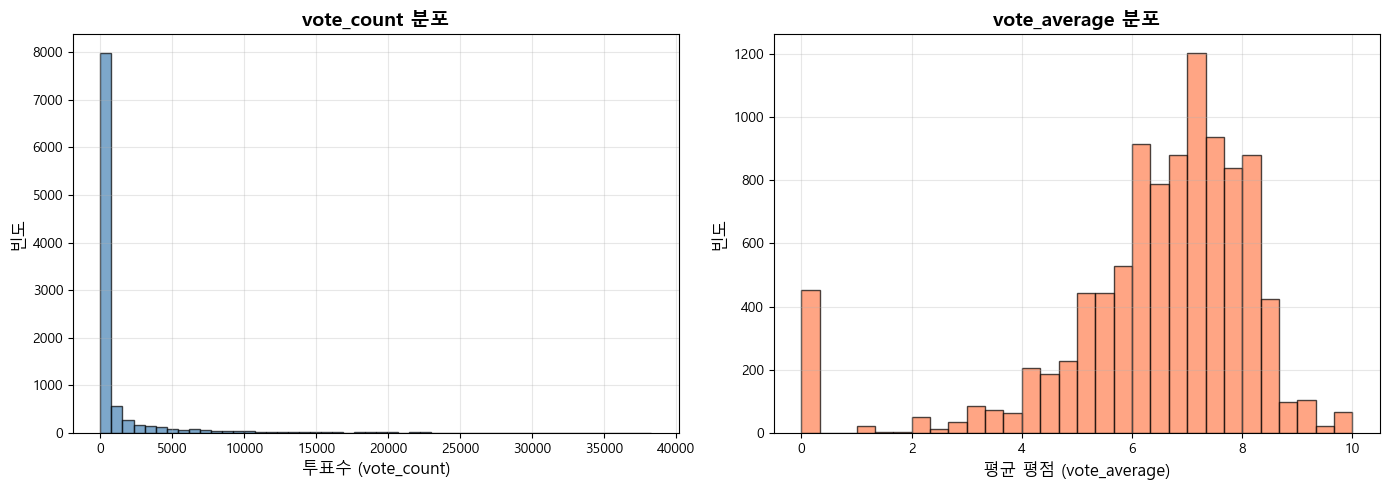

In [ ]:
# 수치형 변수 분포 시각화
# "대부분의 작품이 투표수 몇 개 정도인지", "평점이 어느 범위에 몰려 있는지"
# 목적: 데이터가 어느 값에 집중되어 있는지 파악
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# vote_count 분포
axes[0].hist(df['vote_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('vote_count 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('투표수 (vote_count)', fontsize=12)
axes[0].set_ylabel('빈도', fontsize=12)
axes[0].grid(alpha=0.3)

# vote_average 분포
axes[1].hist(df['vote_average'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('vote_average 분포', fontsize=14, fontweight='bold')
axes[1].set_xlabel('평균 평점 (vote_average)', fontsize=12)
axes[1].set_ylabel('빈도', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 4. 결측치 및 이상치 탐색

- 각 컬럼의 결측치 수
- 이상치 탐색 방법: boxplot, IQR, 도수분포 등


In [45]:
print("=" * 60)
print("4. 결측치 및 이상치 탐색")
print("=" * 60)

print("\n### 결측치 확인")
print("-" * 60)
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
if len(missing_summary) > 0:
    for col, count in missing_summary.items():
        percentage = (count / len(df)) * 100
        print(f"- `{col}`: {count}건 결측치 ({percentage:.2f}%)")
else:
    print("결측치 없음")

# providers와 genres의 빈 문자열 확인
print("\n### 빈 값 확인")
print("-" * 60)
providers_empty = (df['providers'].isna() | (df['providers'].astype(str).str.strip() == '')).sum()
genres_empty = (df['genres'].isna() | (df['genres'].astype(str).str.strip() == '')).sum()
print(f"- `providers` 빈 값: {providers_empty}건")
print(f"- `genres` 빈 값: {genres_empty}건")


4. 결측치 및 이상치 탐색

### 결측치 확인
------------------------------------------------------------
- `genres`: 127건 결측치 (1.27%)
- `providers`: 6874건 결측치 (68.84%)

### 빈 값 확인
------------------------------------------------------------
- `providers` 빈 값: 6874건
- `genres` 빈 값: 127건


In [46]:
print("\n### 이상치 탐색")
print("-" * 60)

# vote_count가 0이거나 vote_average가 0인 경우
vote_count_zero = (df['vote_count'] == 0).sum()
vote_avg_zero = (df['vote_average'] == 0).sum()
print(f"- `vote_count`가 0인 작품: {vote_count_zero}건")
print(f"- `vote_average`가 0인 작품: {vote_avg_zero}건")

# IQR 방법으로 이상치 탐색
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

vote_count_outliers, vc_lower, vc_upper = detect_outliers_iqr(df['vote_count'])
vote_avg_outliers, va_lower, va_upper = detect_outliers_iqr(df['vote_average'])

print(f"\n- `vote_count` 이상치 (IQR 기준): {len(vote_count_outliers)}건")
print(f"  - 하한: {vc_lower:.2f}")
print(f"  - 상한: {vc_upper:.2f}")

print(f"\n- `vote_average` 이상치 (IQR 기준): {len(vote_avg_outliers)}건")
print(f"  - 하한: {va_lower:.2f}")
print(f"  - 상한: {va_upper:.2f}")



### 이상치 탐색
------------------------------------------------------------
- `vote_count`가 0인 작품: 449건
- `vote_average`가 0인 작품: 452건

- `vote_count` 이상치 (IQR 기준): 1684건
  - 하한: -650.50
  - 상한: 1113.50

- `vote_average` 이상치 (IQR 기준): 614건
  - 하한: 3.06
  - 상한: 10.36


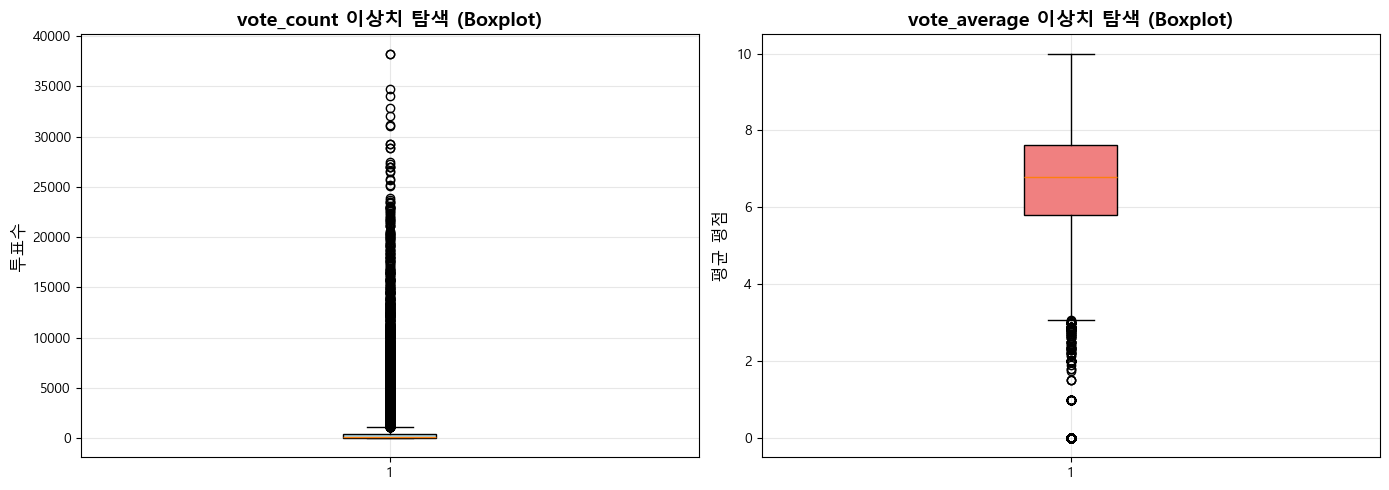

In [47]:
# Boxplot으로 이상치 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# vote_count boxplot
bp1 = axes[0].boxplot(df['vote_count'], vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightblue')
axes[0].set_title('vote_count 이상치 탐색 (Boxplot)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('투표수', fontsize=12)
axes[0].grid(alpha=0.3)

# vote_average boxplot
bp2 = axes[1].boxplot(df['vote_average'], vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightcoral')
axes[1].set_title('vote_average 이상치 탐색 (Boxplot)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('평균 평점', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 4.1 OTT별 작품 필터링 및 Provider별 장르 강세 분석 (사전 분석)


In [48]:
# 데이터 전처리: 이상치 제거 (vote_count > 0, vote_average > 0)
df_clean = df[(df['vote_count'] > 0) & (df['vote_average'] > 0)].copy()
print(f"전처리 후 데이터 크기: {df_clean.shape[0]:,}개 (원본: {df.shape[0]:,}개)")

# providers 컬럼 전처리 (쉼표로 구분된 여러 OTT 플랫폼 분리)
df_clean['providers'] = df_clean['providers'].fillna('')
df_clean['providers_list'] = df_clean['providers'].apply(
    lambda x: [p.strip() for p in str(x).split(',') if p.strip()] if pd.notna(x) and str(x).strip() else []
)

# genres 컬럼 전처리 (쉼표로 구분된 여러 장르 분리)
df_clean['genres_list'] = df_clean['genres'].apply(
    lambda x: [g.strip() for g in str(x).split(',') if g.strip()] if pd.notna(x) and str(x).strip() else []
)

print("전처리 완료!")


전처리 후 데이터 크기: 9,533개 (원본: 9,985개)
전처리 완료!


In [49]:
print("\n" + "=" * 60)
print("OTT별 작품 필터링 및 Provider별 장르 강세 분석")
print("=" * 60)

# 주요 OTT 플랫폼만 필터링
main_providers = ['Netflix', 'Disney Plus', 'wavve', 'Watcha', 'TVING', 'Amazon Prime Video', 'Apple TV']

print("\n### 주요 OTT 플랫폼별 작품 수")
print("-" * 60)

provider_counts = {}
for provider in main_providers:
    count = df_clean['providers'].str.contains(provider, na=False).sum()
    provider_counts[provider] = count
    print(f"- {provider}: {count:,}개")



OTT별 작품 필터링 및 Provider별 장르 강세 분석

### 주요 OTT 플랫폼별 작품 수
------------------------------------------------------------
- Netflix: 965개
- Disney Plus: 622개
- wavve: 609개
- Watcha: 1,129개
- TVING: 858개
- Amazon Prime Video: 182개
- Apple TV: 63개


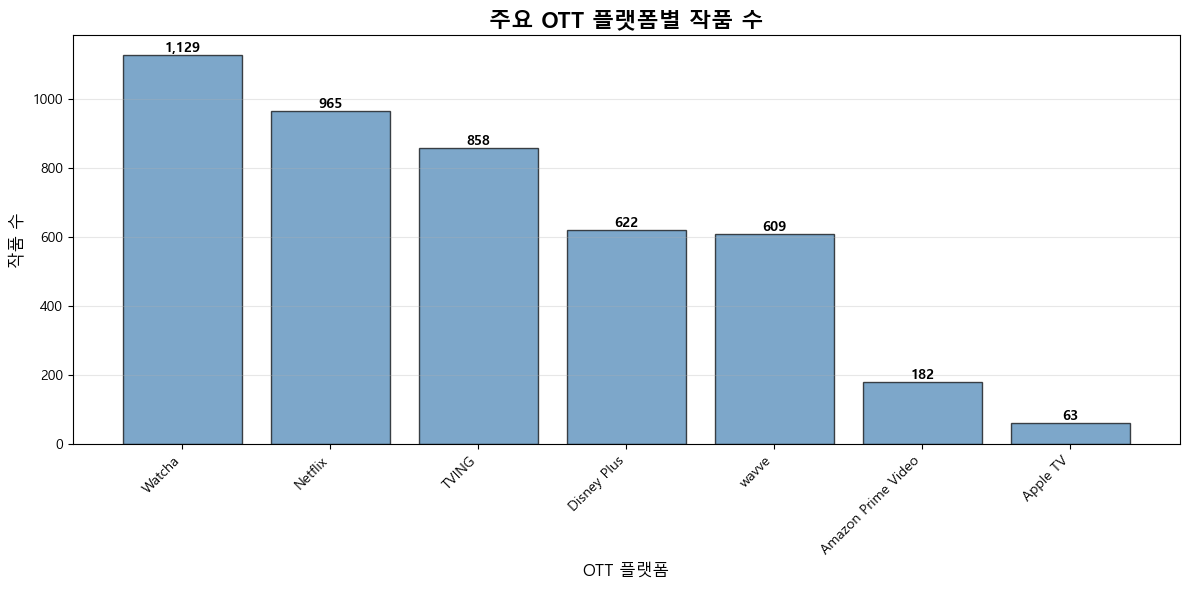

In [50]:
# OTT 플랫폼별 작품 수 시각화
plt.figure(figsize=(12, 6))
provider_df = pd.DataFrame(list(provider_counts.items()), columns=['Provider', 'Count'])
provider_df = provider_df.sort_values('Count', ascending=False)

bars = plt.bar(provider_df['Provider'], provider_df['Count'], color='steelblue', edgecolor='black', alpha=0.7)
plt.title('주요 OTT 플랫폼별 작품 수', fontsize=16, fontweight='bold')
plt.xlabel('OTT 플랫폼', fontsize=12)
plt.ylabel('작품 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# 값 표시
for i, v in enumerate(provider_df['Count']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [51]:
print("\n### Provider별 장르 강세 분석")
print("-" * 60)

provider_genre_analysis = {}

for provider in main_providers:
    # 해당 플랫폼에 있는 작품 필터링
    provider_df = df_clean[df_clean['providers'].str.contains(provider, na=False)]
    
    # 모든 장르 수집
    genre_counts = {}
    for genres_list in provider_df['genres_list']:
        for genre in genres_list:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1
    
    # 장르별 작품 수를 내림차순으로 정렬
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    provider_genre_analysis[provider] = sorted_genres
    
    print(f"\n[{provider}]")
    print(f"총 작품 수: {len(provider_df):,}개")
    print("상위 5개 장르:")
    for genre, count in sorted_genres[:5]:
        percentage = (count / len(provider_df)) * 100
        print(f"  - {genre}: {count}개 ({percentage:.1f}%)")



### Provider별 장르 강세 분석
------------------------------------------------------------

[Netflix]
총 작품 수: 965개
상위 5개 장르:
  - 드라마: 522개 (54.1%)
  - 코미디: 337개 (34.9%)
  - 애니메이션: 258개 (26.7%)
  - Sci-Fi & Fantasy: 200개 (20.7%)
  - Action & Adventure: 198개 (20.5%)

[Disney Plus]
총 작품 수: 622개
상위 5개 장르:
  - 코미디: 245개 (39.4%)
  - 드라마: 213개 (34.2%)
  - 애니메이션: 198개 (31.8%)
  - 가족: 192개 (30.9%)
  - 모험: 165개 (26.5%)

[wavve]
총 작품 수: 609개
상위 5개 장르:
  - 드라마: 335개 (55.0%)
  - 액션: 147개 (24.1%)
  - 스릴러: 129개 (21.2%)
  - 코미디: 122개 (20.0%)
  - 범죄: 99개 (16.3%)

[Watcha]
총 작품 수: 1,129개
상위 5개 장르:
  - 드라마: 531개 (47.0%)
  - 애니메이션: 417개 (36.9%)
  - 코미디: 383개 (33.9%)
  - Sci-Fi & Fantasy: 248개 (22.0%)
  - Action & Adventure: 230개 (20.4%)

[TVING]
총 작품 수: 858개
상위 5개 장르:
  - 드라마: 432개 (50.3%)
  - 애니메이션: 375개 (43.7%)
  - 코미디: 313개 (36.5%)
  - Sci-Fi & Fantasy: 253개 (29.5%)
  - Action & Adventure: 223개 (26.0%)

[Amazon Prime Video]
총 작품 수: 182개
상위 5개 장르:
  - 드라마: 98개 (53.8%)
  - 코미디: 68개 (37.4%)
  - 애니메이션: 42개 (23.1

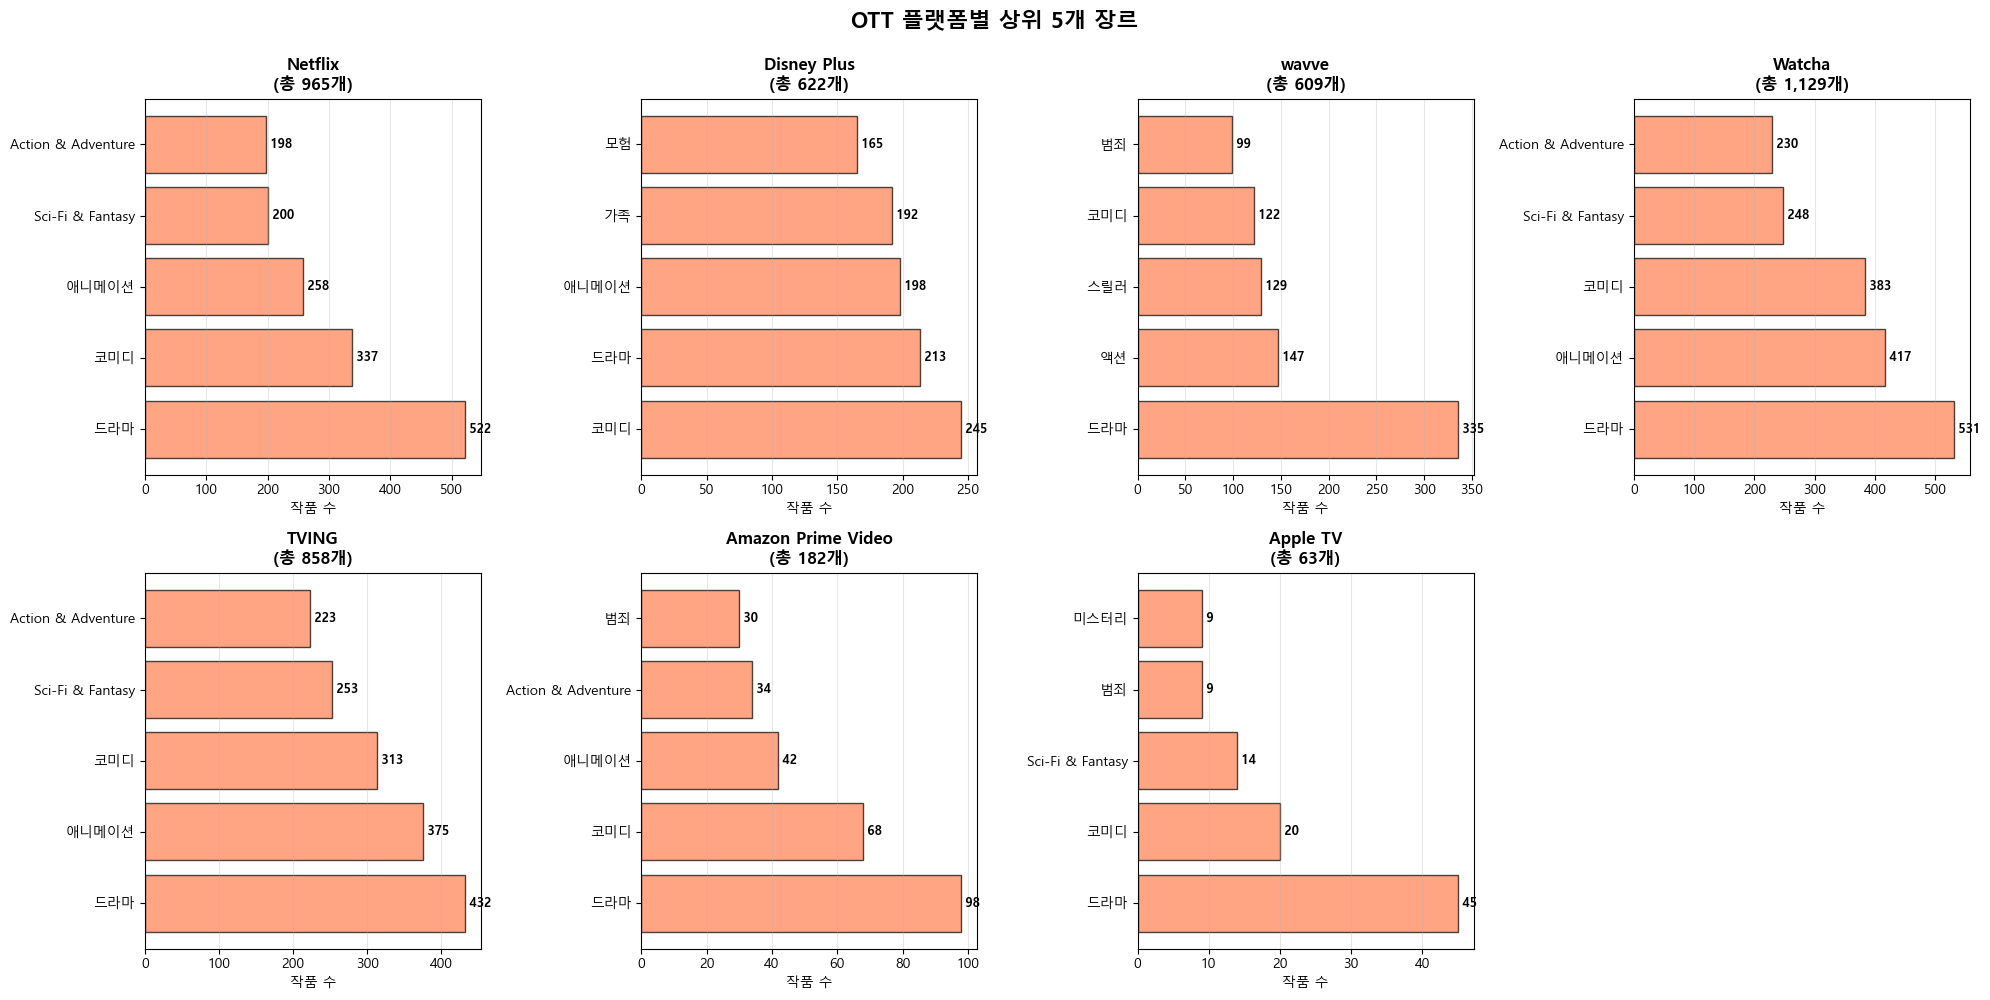

In [52]:
# OTT 플랫폼별 장르 강세 시각화 (상위 5개 장르)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, provider in enumerate(main_providers):
    if idx >= len(axes):
        break
    
    genres_data = provider_genre_analysis[provider][:5]
    genres = [g[0] for g in genres_data]
    counts = [g[1] for g in genres_data]
    
    bars = axes[idx].barh(genres, counts, color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{provider}\n(총 {len(df_clean[df_clean["providers"].str.contains(provider, na=False)]):,}개)', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('작품 수', fontsize=10)
    axes[idx].grid(axis='x', alpha=0.3)
    
    # 값 표시
    for i, v in enumerate(counts):
        axes[idx].text(v, i, f' {v}', va='center', fontsize=9, fontweight='bold')

# 마지막 subplot 제거 (7개만 필요)
if len(main_providers) < 8:
    axes[7].remove()

plt.suptitle('OTT 플랫폼별 상위 5개 장르', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


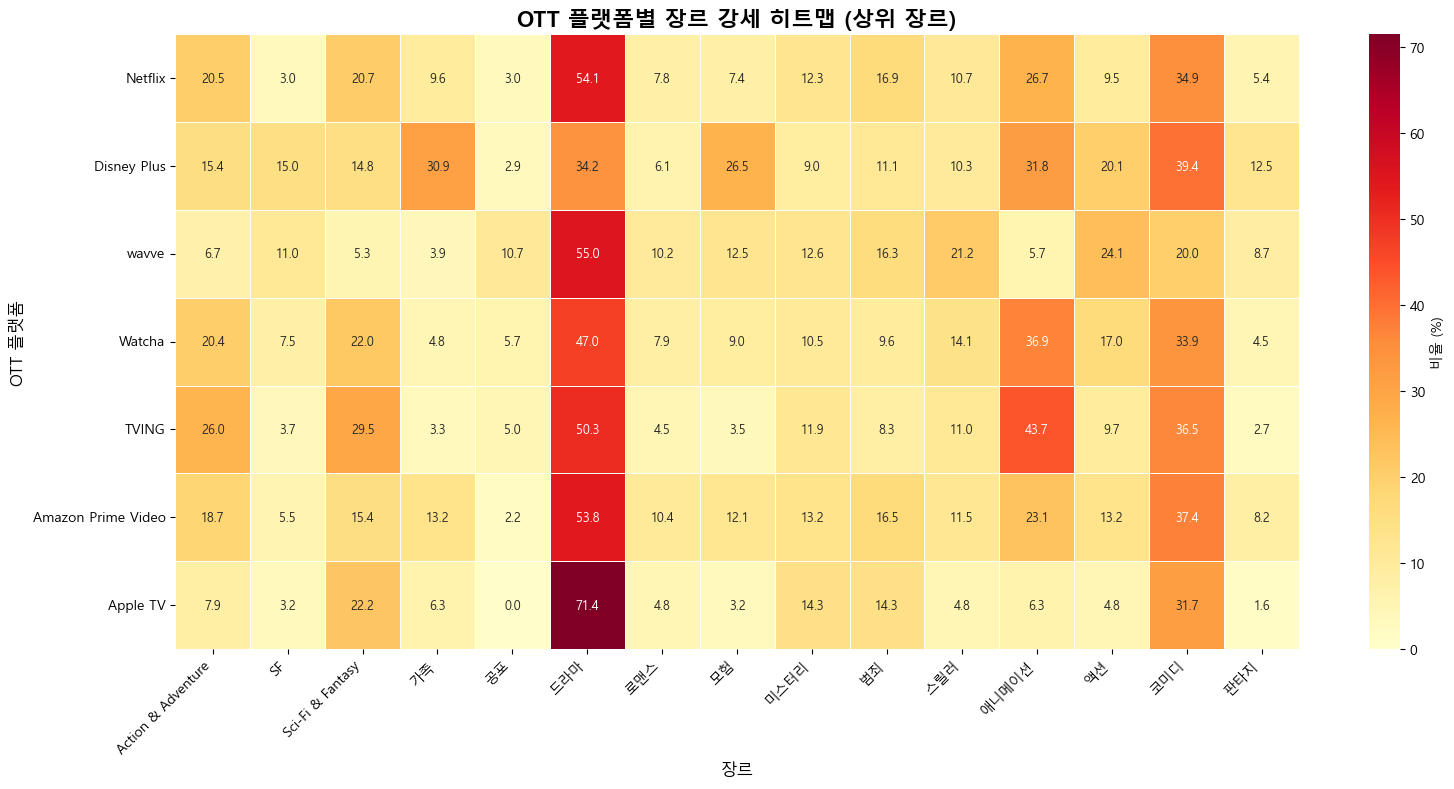

In [53]:
# OTT 플랫폼별 장르 강세 히트맵
# 각 플랫폼별 상위 10개 장르 추출
top_genres = set()
for provider in main_providers:
    top_genres.update([g[0] for g in provider_genre_analysis[provider][:10]])

# 플랫폼별 장르 비율 계산
heatmap_data = []
for provider in main_providers:
    provider_df = df_clean[df_clean['providers'].str.contains(provider, na=False)]
    total = len(provider_df)
    
    row = []
    for genre in sorted(top_genres):
        count = sum(1 for genres_list in provider_df['genres_list'] if genre in genres_list)
        percentage = (count / total) * 100 if total > 0 else 0
        row.append(percentage)
    heatmap_data.append(row)

# 히트맵 생성
heatmap_df = pd.DataFrame(heatmap_data, 
                          index=main_providers, 
                          columns=sorted(top_genres))

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_df, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': '비율 (%)'}, linewidths=0.5, 
            annot_kws={'size': 9})
plt.title('OTT 플랫폼별 장르 강세 히트맵 (상위 장르)', fontsize=16, fontweight='bold')
plt.xlabel('장르', fontsize=12)
plt.ylabel('OTT 플랫폼', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [54]:
print("=" * 60)
print("5. 변수 간 관계 분석")
print("=" * 60)

# 상관관계 분석
print("\n### 수치형 변수 간 상관관계")
print("-" * 60)
correlation = df_clean[['vote_count', 'vote_average']].corr()
print(correlation.round(3))

print(f"\n- `vote_count`와 `vote_average` 상관계수: {correlation.loc['vote_count', 'vote_average']:.3f}")


5. 변수 간 관계 분석

### 수치형 변수 간 상관관계
------------------------------------------------------------
              vote_count  vote_average
vote_count          1.00          0.18
vote_average        0.18          1.00

- `vote_count`와 `vote_average` 상관계수: 0.180


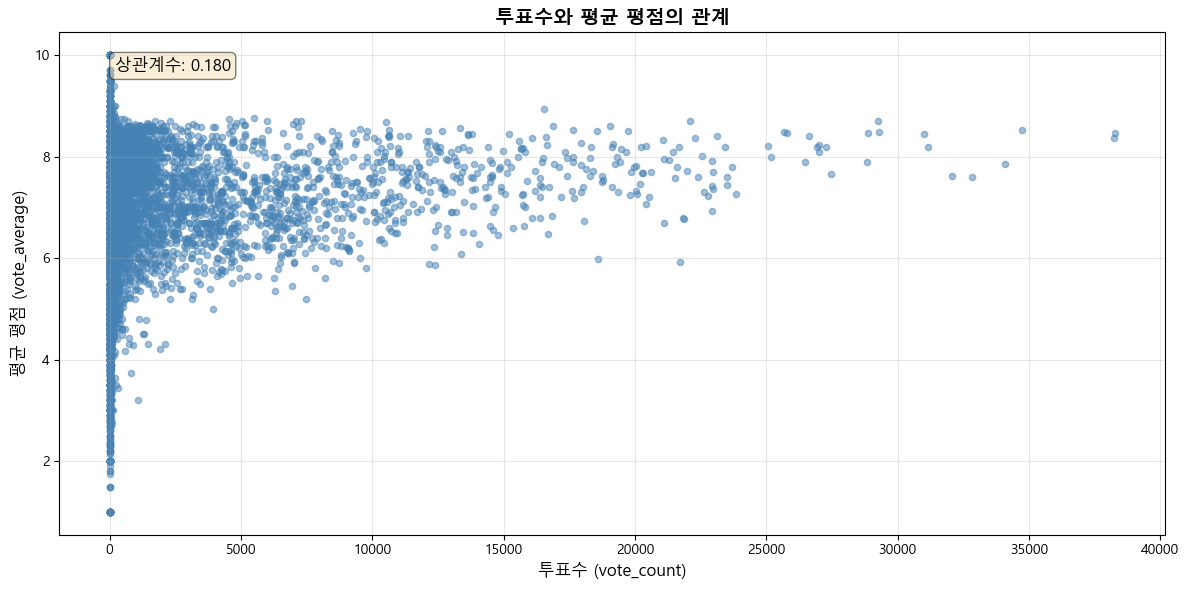

In [55]:
# 산점도로 vote_count와 vote_average 관계 시각화
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['vote_count'], df_clean['vote_average'], 
            alpha=0.5, s=20, color='steelblue')
plt.xlabel('투표수 (vote_count)', fontsize=12)
plt.ylabel('평균 평점 (vote_average)', fontsize=12)
plt.title('투표수와 평균 평점의 관계', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# 상관계수 표시
corr_coef = df_clean['vote_count'].corr(df_clean['vote_average'])
plt.text(0.05, 0.95, f'상관계수: {corr_coef:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()



### OTT 플랫폼별 평균 평점
------------------------------------------------------------
- Netflix: 7.44
- Apple TV: 7.39
- TVING: 7.39
- Amazon Prime Video: 7.26
- Watcha: 7.23
- Disney Plus: 7.23
- wavve: 6.97


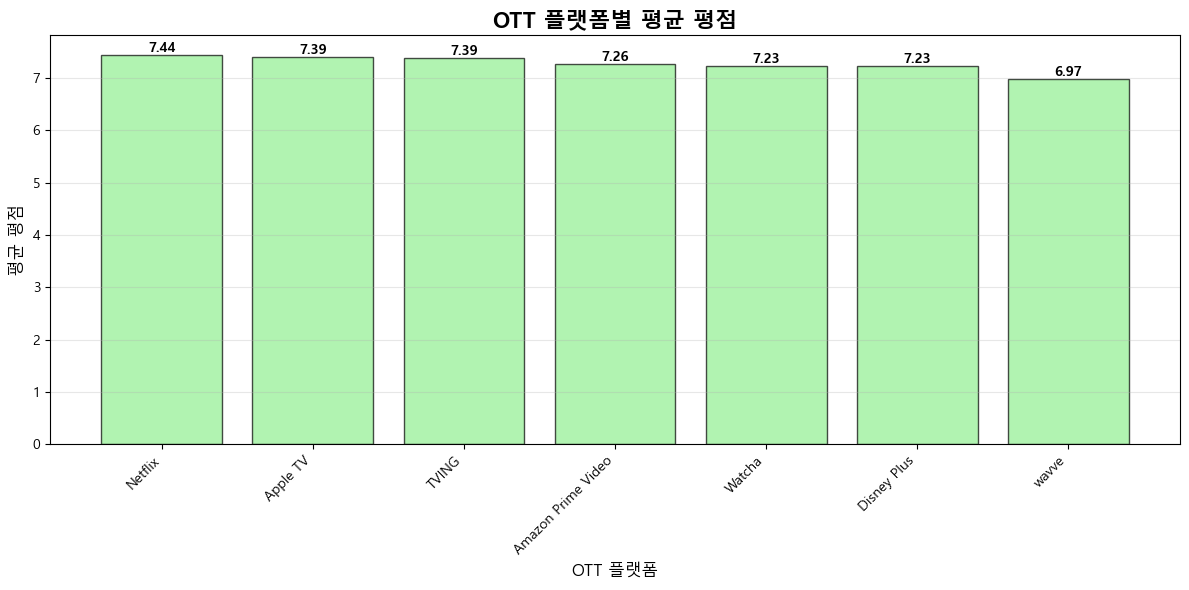

In [56]:
# OTT 플랫폼별 평균 평점 비교
main_providers = ['Netflix', 'Disney Plus', 'wavve', 'Watcha', 'TVING', 'Amazon Prime Video', 'Apple TV']

provider_avg_ratings = {}
for provider in main_providers:
    provider_df = df_clean[df_clean['providers'].str.contains(provider, na=False)]
    if len(provider_df) > 0:
        provider_avg_ratings[provider] = provider_df['vote_average'].mean()

print("\n### OTT 플랫폼별 평균 평점")
print("-" * 60)
for provider, avg_rating in sorted(provider_avg_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"- {provider}: {avg_rating:.2f}")

# 시각화
if provider_avg_ratings:
    plt.figure(figsize=(12, 6))
    provider_ratings_df = pd.DataFrame(list(provider_avg_ratings.items()), 
                                       columns=['Provider', 'AvgRating'])
    provider_ratings_df = provider_ratings_df.sort_values('AvgRating', ascending=False)
    
    bars = plt.bar(provider_ratings_df['Provider'], provider_ratings_df['AvgRating'], 
                   color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title('OTT 플랫폼별 평균 평점', fontsize=16, fontweight='bold')
    plt.xlabel('OTT 플랫폼', fontsize=12)
    plt.ylabel('평균 평점', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # 값 표시
    for i, v in enumerate(provider_ratings_df['AvgRating']):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


## 6. 파생 변수 생성 및 전처리 제안

- 범주형 그룹핑, 나이 구간화 등
- 로그변환, 정규화 여부


In [57]:
print("=" * 60)
print("6. 파생 변수 생성 및 전처리 제안")
print("=" * 60)

# OTT 플랫폼 개수 파생 변수
df_clean['provider_count'] = df_clean['providers_list'].apply(len)

# 장르 개수 파생 변수
df_clean['genre_count'] = df_clean['genres_list'].apply(len)

# 투표수 구간화 (로그 스케일 기준)
df_clean['vote_count_log'] = np.log1p(df_clean['vote_count'])  # log(1+x) 변환

# 투표수 구간 분류
vote_count_median = df_clean['vote_count'].median()
df_clean['vote_count_category'] = pd.cut(
    df_clean['vote_count'],
    bins=[0, vote_count_median, df_clean['vote_count'].quantile(0.75), df_clean['vote_count'].max()],
    labels=['낮음', '중간', '높음']
)

# 평점 구간 분류
df_clean['vote_avg_category'] = pd.cut(
    df_clean['vote_average'],
    bins=[0, 6, 7, 8, 10],
    labels=['낮음(0-6)', '보통(6-7)', '좋음(7-8)', '우수(8-10)']
)

print("\n### 파생 변수 생성 완료")
print("-" * 60)
print(f"- `provider_count`: OTT 플랫폼 개수")
print(f"- `genre_count`: 장르 개수")
print(f"- `vote_count_log`: 투표수 로그 변환")
print(f"- `vote_count_category`: 투표수 구간 (낮음/중간/높음)")
print(f"- `vote_avg_category`: 평점 구간 (낮음/보통/좋음/우수)")

print(f"\n투표수 구간별 분포:")
print(df_clean['vote_count_category'].value_counts().sort_index())
print(f"\n평점 구간별 분포:")
print(df_clean['vote_avg_category'].value_counts().sort_index())


6. 파생 변수 생성 및 전처리 제안

### 파생 변수 생성 완료
------------------------------------------------------------
- `provider_count`: OTT 플랫폼 개수
- `genre_count`: 장르 개수
- `vote_count_log`: 투표수 로그 변환
- `vote_count_category`: 투표수 구간 (낮음/중간/높음)
- `vote_avg_category`: 평점 구간 (낮음/보통/좋음/우수)

투표수 구간별 분포:
vote_count_category
낮음    4773
중간    2377
높음    2383
Name: count, dtype: int64

평점 구간별 분포:
vote_avg_category
낮음(0-6)     2570
보통(6-7)     2630
좋음(7-8)     2925
우수(8-10)    1408
Name: count, dtype: int64


### 6.1 숨은 명작 찾기 분석

**분석 전략:**
1. 투표수는 평균 이상
2. 사분위수 90% 이상 (평점 상위 10%)
3. 로튼 6점대 이상 (평점 6.0 이상)
4. 투표수는 하위 50% (대중성은 낮지만 평이 좋은 작품)


In [58]:
print("\n" + "=" * 60)
print("6.1 숨은 명작 찾기 분석")
print("=" * 60)

# 투표수 평균 계산
vote_count_mean = df_clean['vote_count'].mean()
vote_count_median = df_clean['vote_count'].median()

print(f"\n투표수 통계:")
print(f"- 평균: {vote_count_mean:.2f}")
print(f"- 중앙값: {vote_count_median:.2f}")

# 조건 1: 투표수는 평균 이상
df_hidden = df_clean[df_clean['vote_count'] >= vote_count_mean].copy()
print(f"\n조건 1 적용 (투표수 >= 평균): {len(df_hidden):,}개 작품")

# 조건 2: 평점 6.0 이상 (로튼 6점대 이상)
df_hidden = df_hidden[df_hidden['vote_average'] >= 6.0].copy()
print(f"조건 2 적용 (평점 >= 6.0): {len(df_hidden):,}개 작품")

# 조건 3: 평균평점 상위 10% (사분위수 90% 이상)
vote_avg_threshold_90 = df_hidden['vote_average'].quantile(0.9)
print(f"\n평균평점 상위 10% 기준: {vote_avg_threshold_90:.2f} 이상")

# 조건 4: 투표수 하위 50% (대중성은 낮지만 평이 좋은 작품)
vote_count_threshold_50 = df_hidden['vote_count'].quantile(0.5)
print(f"투표수 하위 50% 기준: {vote_count_threshold_50:.2f} 이하")

# 숨은 명작 필터링
hidden_gems = df_hidden[
    (df_hidden['vote_average'] >= vote_avg_threshold_90) & 
    (df_hidden['vote_count'] <= vote_count_threshold_50)
].copy()

print(f"\n숨은 명작 후보: {len(hidden_gems):,}개 작품")
print(f"  - 평균평점 상위 10%: {vote_avg_threshold_90:.2f} 이상")
print(f"  - 투표수 하위 50%: {vote_count_threshold_50:.2f} 이하")
print(f"  - 투표수 평균 이상: {vote_count_mean:.2f} 이상")
print(f"  - 평점 6.0 이상")



6.1 숨은 명작 찾기 분석

투표수 통계:
- 평균: 1176.82
- 중앙값: 68.00

조건 1 적용 (투표수 >= 평균): 1,636개 작품
조건 2 적용 (평점 >= 6.0): 1,537개 작품

평균평점 상위 10% 기준: 8.30 이상
투표수 하위 50% 기준: 4124.00 이하

숨은 명작 후보: 85개 작품
  - 평균평점 상위 10%: 8.30 이상
  - 투표수 하위 50%: 4124.00 이하
  - 투표수 평균 이상: 1176.82 이상
  - 평점 6.0 이상


In [59]:
# 숨은 명작 상위 20개 출력
hidden_gems_sorted = hidden_gems.sort_values('vote_average', ascending=False)

print("\n" + "=" * 60)
print("숨은 명작 TOP 20")
print("=" * 60)
print(f"{'순위':<5} {'제목':<40} {'평점':<8} {'투표수':<10} {'OTT 플랫폼':<30}")
print("-" * 100)

for idx, (i, row) in enumerate(hidden_gems_sorted.head(20).iterrows(), 1):
    title = row['title'][:38] + '..' if len(str(row['title'])) > 40 else row['title']
    providers = ', '.join(row['providers_list'][:2]) if row['providers_list'] else '없음'
    if len(providers) > 28:
        providers = providers[:26] + '..'
    print(f"{idx:<5} {title:<40} {row['vote_average']:<8.2f} {int(row['vote_count']):<10} {providers:<30}")



숨은 명작 TOP 20
순위    제목                                       평점       투표수        OTT 플랫폼                       
----------------------------------------------------------------------------------------------------
1     강철의 연금술사 BROTHERHOOD                     8.70     2291       Watcha, Crunchyroll           
2     아울 하우스                                   8.70     1728       Disney Plus                   
3     해즈빈 호텔                                   8.66     1427       Amazon Prime Video            
4     헌터x헌터                                    8.66     1971       Netflix, Watcha               
5     소프라노스                                    8.65     3185       없음                            
6     원스                                       8.64     1498       Disney Plus                   
7     나 혼자만 레벨업                                8.61     1434       Netflix, Watcha               
8     란마 1/2                                   8.61     1477       없음                            
9  

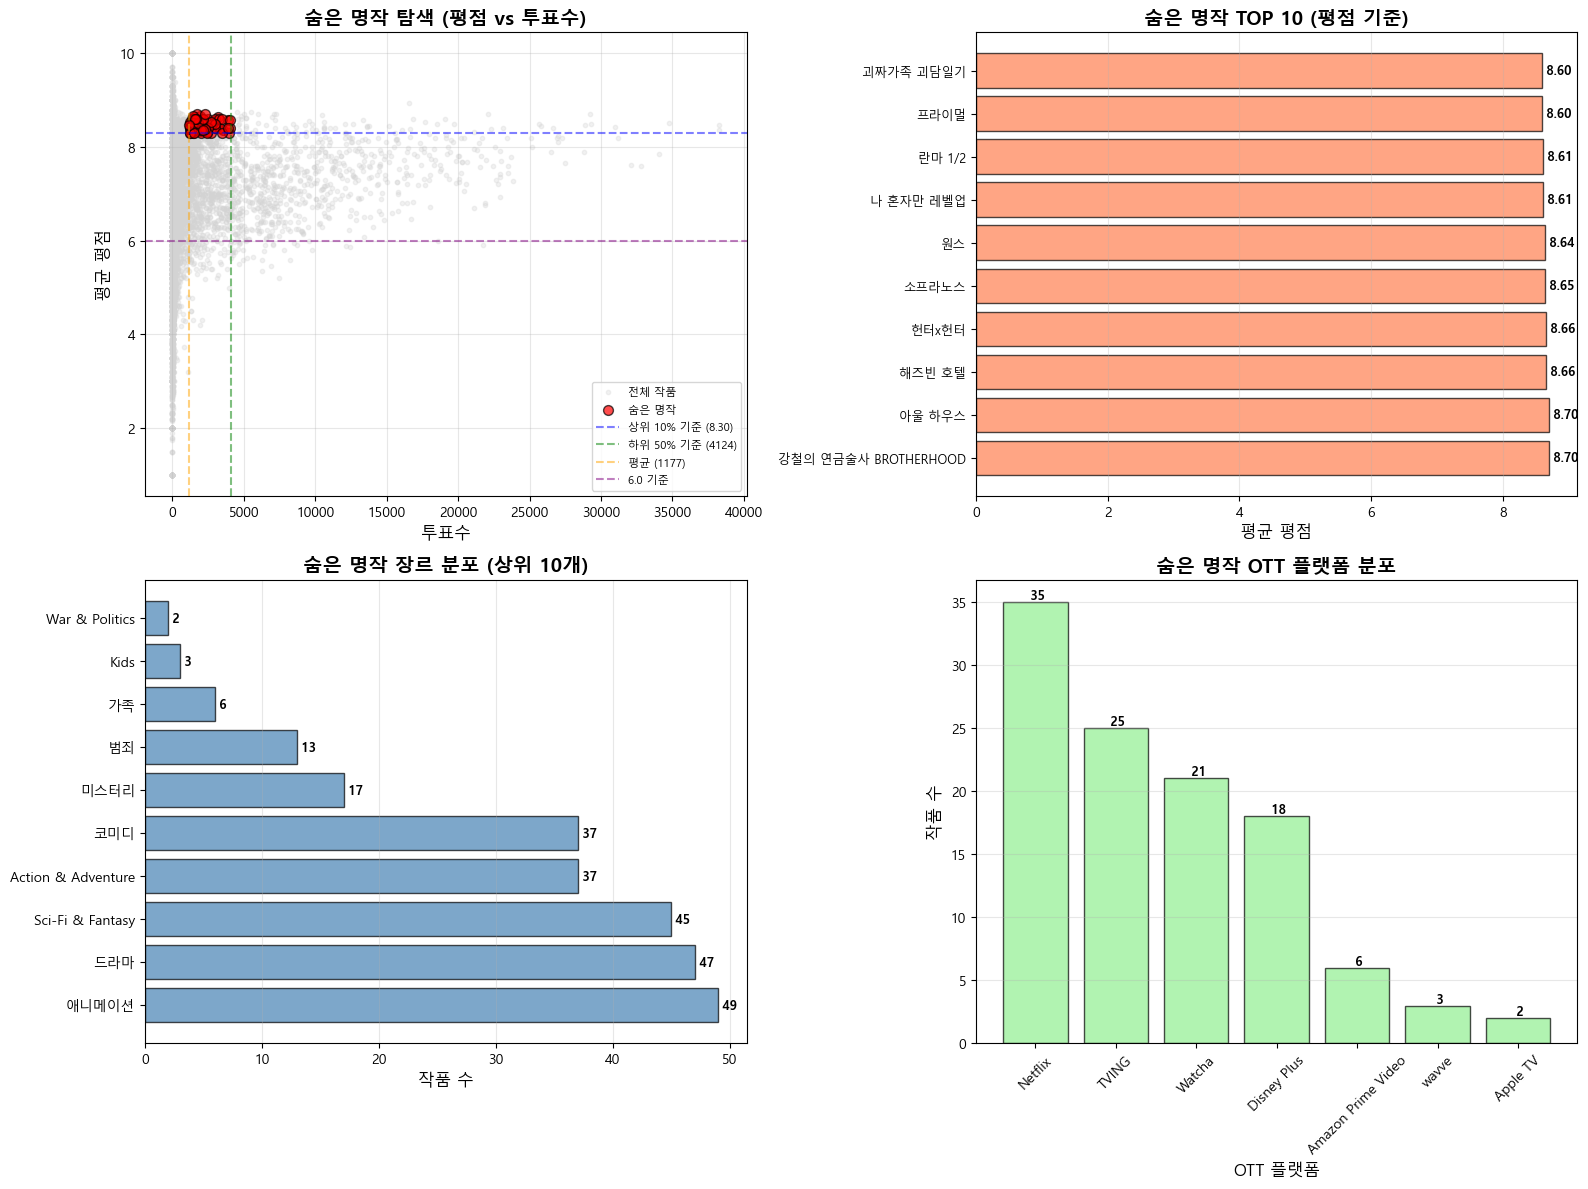

In [60]:
# 숨은 명작 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 평점 vs 투표수 산점도 (전체 vs 숨은 명작)
ax1 = axes[0, 0]
ax1.scatter(df_clean['vote_count'], df_clean['vote_average'], 
           alpha=0.3, s=10, color='lightgray', label='전체 작품')
ax1.scatter(hidden_gems['vote_count'], hidden_gems['vote_average'], 
           alpha=0.7, s=50, color='red', label='숨은 명작', edgecolors='black', linewidth=1)
ax1.axhline(y=vote_avg_threshold_90, color='blue', linestyle='--', alpha=0.5, label=f'상위 10% 기준 ({vote_avg_threshold_90:.2f})')
ax1.axvline(x=vote_count_threshold_50, color='green', linestyle='--', alpha=0.5, label=f'하위 50% 기준 ({vote_count_threshold_50:.0f})')
ax1.axvline(x=vote_count_mean, color='orange', linestyle='--', alpha=0.5, label=f'평균 ({vote_count_mean:.0f})')
ax1.axhline(y=6.0, color='purple', linestyle='--', alpha=0.5, label='6.0 기준')
ax1.set_xlabel('투표수', fontsize=12)
ax1.set_ylabel('평균 평점', fontsize=12)
ax1.set_title('숨은 명작 탐색 (평점 vs 투표수)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(alpha=0.3)

# 2. 숨은 명작 상위 10개 막대 그래프
ax2 = axes[0, 1]
top_10 = hidden_gems_sorted.head(10)
bars = ax2.barh(range(len(top_10)), top_10['vote_average'], color='coral', edgecolor='black', alpha=0.7)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels([title[:30] + '..' if len(title) > 32 else title for title in top_10['title']], fontsize=9)
ax2.set_xlabel('평균 평점', fontsize=12)
ax2.set_title('숨은 명작 TOP 10 (평점 기준)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_10['vote_average']):
    ax2.text(v, i, f' {v:.2f}', va='center', fontsize=9, fontweight='bold')

# 3. 숨은 명작 장르 분포
ax3 = axes[1, 0]
hidden_genres = {}
for genres_list in hidden_gems['genres_list']:
    for genre in genres_list:
        hidden_genres[genre] = hidden_genres.get(genre, 0) + 1
hidden_genres_sorted = sorted(hidden_genres.items(), key=lambda x: x[1], reverse=True)[:10]
if hidden_genres_sorted:
    genres_names = [g[0] for g in hidden_genres_sorted]
    genres_counts = [g[1] for g in hidden_genres_sorted]
    bars = ax3.barh(genres_names, genres_counts, color='steelblue', edgecolor='black', alpha=0.7)
    ax3.set_xlabel('작품 수', fontsize=12)
    ax3.set_title('숨은 명작 장르 분포 (상위 10개)', fontsize=14, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)
    for i, v in enumerate(genres_counts):
        ax3.text(v, i, f' {v}', va='center', fontsize=9, fontweight='bold')
else:
    ax3.text(0.5, 0.5, '데이터 없음', ha='center', va='center', transform=ax3.transAxes, fontsize=12)

# 4. 숨은 명작 OTT 플랫폼 분포
ax4 = axes[1, 1]
hidden_providers = {}
for providers_list in hidden_gems['providers_list']:
    for provider in providers_list:
        if provider in main_providers:
            hidden_providers[provider] = hidden_providers.get(provider, 0) + 1
hidden_providers_sorted = sorted(hidden_providers.items(), key=lambda x: x[1], reverse=True)
if hidden_providers_sorted:
    providers_names = [p[0] for p in hidden_providers_sorted]
    providers_counts = [p[1] for p in hidden_providers_sorted]
    bars = ax4.bar(providers_names, providers_counts, color='lightgreen', edgecolor='black', alpha=0.7)
    ax4.set_xlabel('OTT 플랫폼', fontsize=12)
    ax4.set_ylabel('작품 수', fontsize=12)
    ax4.set_title('숨은 명작 OTT 플랫폼 분포', fontsize=14, fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(axis='y', alpha=0.3)
    for i, v in enumerate(providers_counts):
        ax4.text(i, v, f' {v}', ha='center', va='bottom', fontsize=9, fontweight='bold')
else:
    ax4.text(0.5, 0.5, '데이터 없음', ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('숨은 명작 OTT 플랫폼 분포', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. 요약 및 인사이트 도출

- 주요 특징 정리
- 모델링 방향성 제시


In [61]:
print("=" * 60)
print("7. 요약 및 인사이트 도출")
print("=" * 60)

print("\n### 주요 발견 사항")
print("-" * 60)

# 1. 데이터 요약
print("\n1. 데이터 요약:")
print(f"   - 총 작품 수: {df.shape[0]:,}개")
print(f"   - 전처리 후 작품 수: {df_clean.shape[0]:,}개")
print(f"   - 평균 투표수: {df_clean['vote_count'].mean():.2f}")
print(f"   - 평균 평점: {df_clean['vote_average'].mean():.2f}")

# 2. 변수 간 관계
print("\n2. 변수 간 관계:")
corr_coef = df_clean['vote_count'].corr(df_clean['vote_average'])
print(f"   - `vote_count`와 `vote_average` 상관계수: {corr_coef:.3f}")
if corr_coef > 0:
    print("     → 투표수가 많을수록 평점이 높은 경향 (약한 양의 상관관계)")
else:
    print("     → 투표수와 평점 간 음의 상관관계")

# 3. OTT 플랫폼 인사이트
print("\n3. OTT 플랫폼별 특성:")
main_providers = ['Netflix', 'Disney Plus', 'wavve', 'Watcha', 'TVING', 'Amazon Prime Video', 'Apple TV']
provider_counts = {}
for provider in main_providers:
    count = df_clean['providers'].str.contains(provider, na=False).sum()
    provider_counts[provider] = count

if provider_counts:
    top_provider = max(provider_counts.items(), key=lambda x: x[1])
    print(f"   - 가장 많은 작품을 보유한 플랫폼: {top_provider[0]} ({top_provider[1]:,}개)")

# 4. 숨은 명작 인사이트
print("\n4. 숨은 명작 분석:")
print(f"   - 발견된 숨은 명작: {len(hidden_gems):,}개")
if len(hidden_gems) > 0:
    print(f"   - 평균 평점 범위: {hidden_gems['vote_average'].min():.2f} ~ {hidden_gems['vote_average'].max():.2f}")
    print(f"   - 평균 투표수 범위: {hidden_gems['vote_count'].min():.0f} ~ {hidden_gems['vote_count'].max():.0f}")
    
    # 가장 많이 나타나는 장르
    hidden_genres = {}
    for genres_list in hidden_gems['genres_list']:
        for genre in genres_list:
            hidden_genres[genre] = hidden_genres.get(genre, 0) + 1
    if hidden_genres:
        top_genre = max(hidden_genres.items(), key=lambda x: x[1])
        print(f"   - 가장 많이 나타나는 장르: {top_genre[0]} ({top_genre[1]}개)")

print("\n### 분석 방향성")
print("-" * 60)
print("1. OTT 플랫폼별 장르 강세를 파악하여 각 플랫폼의 특성을 이해할 수 있음")
print("2. 숨은 명작을 발견하여 대중성은 낮지만 평이 좋은 작품을 추천할 수 있음")
print("3. 투표수와 평점의 관계를 분석하여 작품의 대중성과 평가의 균형을 확인할 수 있음")
print("4. 각 OTT 플랫폼의 장르 포트폴리오를 비교하여 차별화 전략을 수립할 수 있음")
print("5. 숨은 명작 분석을 통해 사용자에게 새로운 작품 추천 서비스를 제공할 수 있음")


7. 요약 및 인사이트 도출

### 주요 발견 사항
------------------------------------------------------------

1. 데이터 요약:
   - 총 작품 수: 9,985개
   - 전처리 후 작품 수: 9,533개
   - 평균 투표수: 1176.82
   - 평균 평점: 6.71

2. 변수 간 관계:
   - `vote_count`와 `vote_average` 상관계수: 0.180
     → 투표수가 많을수록 평점이 높은 경향 (약한 양의 상관관계)

3. OTT 플랫폼별 특성:
   - 가장 많은 작품을 보유한 플랫폼: Watcha (1,129개)

4. 숨은 명작 분석:
   - 발견된 숨은 명작: 85개
   - 평균 평점 범위: 8.30 ~ 8.70
   - 평균 투표수 범위: 1181 ~ 4064
   - 가장 많이 나타나는 장르: 애니메이션 (49개)

### 분석 방향성
------------------------------------------------------------
1. OTT 플랫폼별 장르 강세를 파악하여 각 플랫폼의 특성을 이해할 수 있음
2. 숨은 명작을 발견하여 대중성은 낮지만 평이 좋은 작품을 추천할 수 있음
3. 투표수와 평점의 관계를 분석하여 작품의 대중성과 평가의 균형을 확인할 수 있음
4. 각 OTT 플랫폼의 장르 포트폴리오를 비교하여 차별화 전략을 수립할 수 있음
5. 숨은 명작 분석을 통해 사용자에게 새로운 작품 추천 서비스를 제공할 수 있음


In [62]:
# 최종 요약 테이블 생성
summary_data = {
    '항목': [
        '전체 작품 수',
        '전처리 후 작품 수',
        '평균 투표수',
        '평균 평점',
        '주요 OTT 플랫폼 수',
        '발견된 숨은 명작 수',
        '투표수-평점 상관계수'
    ],
    '값': [
        f"{df.shape[0]:,}개",
        f"{df_clean.shape[0]:,}개",
        f"{df_clean['vote_count'].mean():.2f}",
        f"{df_clean['vote_average'].mean():.2f}",
        f"{len(main_providers)}개",
        f"{len(hidden_gems):,}개",
        f"{corr_coef:.3f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 60)
print("최종 요약 테이블")
print("=" * 60)
print(summary_df.to_string(index=False))



최종 요약 테이블
          항목       값
     전체 작품 수  9,985개
  전처리 후 작품 수  9,533개
      평균 투표수 1176.82
       평균 평점    6.71
주요 OTT 플랫폼 수      7개
 발견된 숨은 명작 수     85개
 투표수-평점 상관계수   0.180
